___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [60]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')

In [61]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [65]:
df.shape

(10000, 13)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


0    7963
1    2037
Name: Exited, dtype: int64


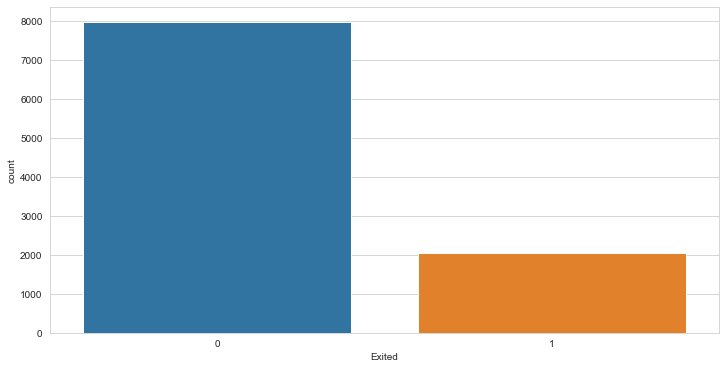

In [67]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

In [68]:
df.drop(['CustomerId'], axis=1, inplace=True)

In [69]:
df.drop(['Surname'], axis=1, inplace=True)

In [70]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


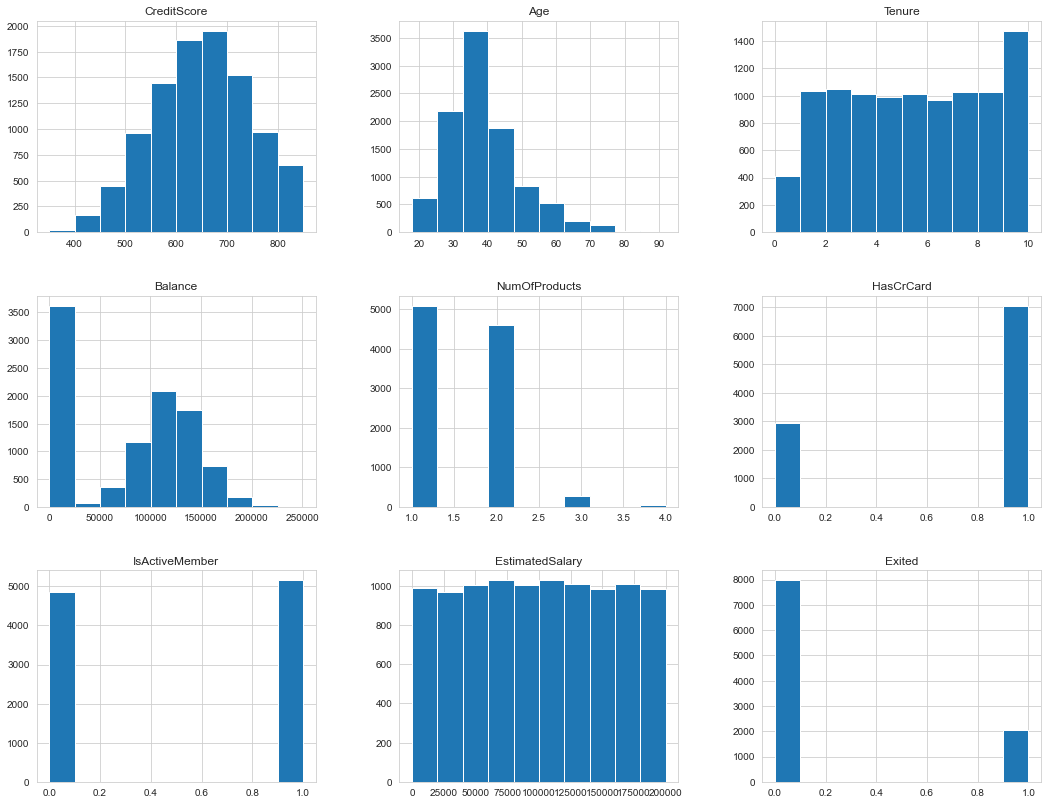

In [71]:
df.hist(figsize=(18, 14));

<AxesSubplot:>

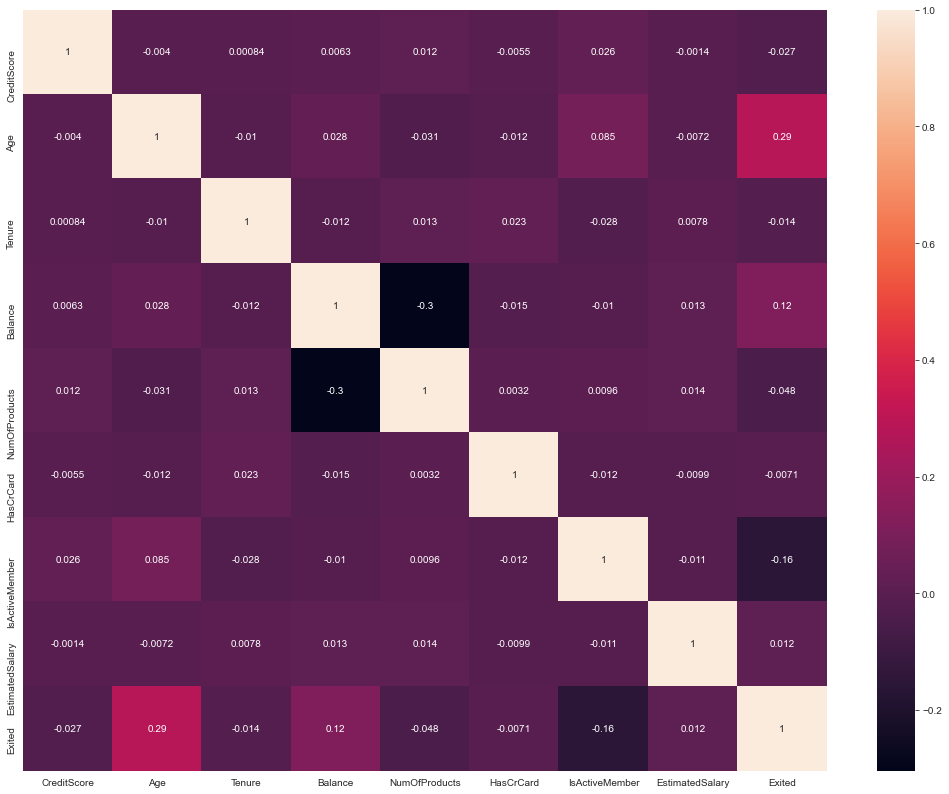

In [72]:
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

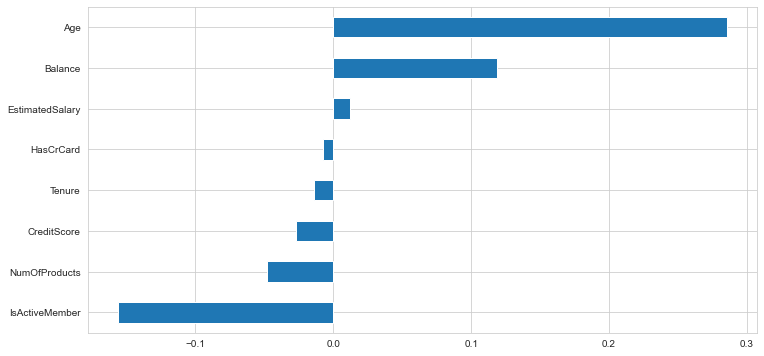

In [73]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

In [74]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [75]:
df.shape

(10000, 12)

## Preprocessing of Data
- Train | Test Split, Scaling

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [77]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values   #we use arrays instead of dataframes in deep learning


In [78]:
seed = 42

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)



In [80]:
scaler = MinMaxScaler()



In [81]:
X_train = scaler.fit_transform(X_train)



In [82]:
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Creating Model

### without class_weigth

In [84]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [85]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [86]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=15)

In [87]:
model.fit(x=X_train, y=y_train, validation_split=.1, batch_size=128, epochs=200, verbose=1, callbacks=[early_stop])

Epoch 1/200
57/57 [==============================] - 2s 7ms/step - loss: 0.5433 - recall: 0.0000e+00 - val_loss: 0.4865 - val_recall: 0.0000e+00
Epoch 2/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4984 - recall: 0.0000e+00 - val_loss: 0.4733 - val_recall: 0.0000e+00
Epoch 3/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4888 - recall: 0.0000e+00 - val_loss: 0.4660 - val_recall: 0.0000e+00
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4814 - recall: 0.0000e+00 - val_loss: 0.4600 - val_recall: 0.0000e+00
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4738 - recall: 0.0169 - val_loss: 0.4534 - val_recall: 0.0395
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4667 - recall: 0.0602 - val_loss: 0.4487 - val_recall: 0.0592
Epoch 7/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4621 - recall: 0.0900 - val_loss: 0.4449 - val_recall: 0.0789
Epoch 8/2

In [88]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                192       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.543,0.000,0.487,0.000
1,0.498,0.000,0.473,0.000
2,0.489,0.000,0.466,0.000
3,0.481,0.000,0.460,0.000
4,0.474,0.017,0.453,0.039


<AxesSubplot:>

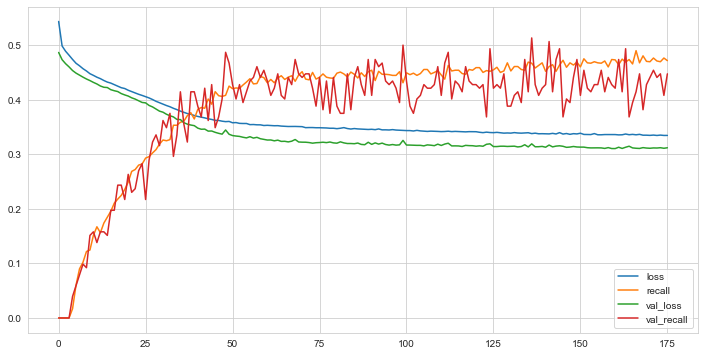

In [90]:
loss_df.plot()

In [91]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1535   58]
 [ 215  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### ROC-AUC

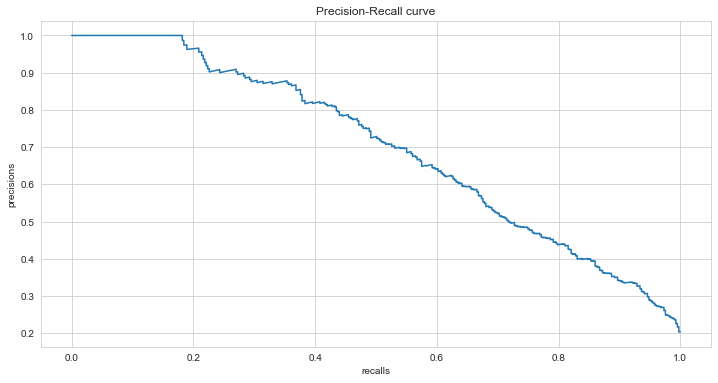

In [92]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


In [93]:
average_precision_score(y_test, y_pred_proba)

0.6984867955025867

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [99]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [100]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [101]:
model.fit(x=X_train, y=y_train, validation_split=.1, batch_size=128, epochs=200, verbose=1, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/200
57/57 [==============================] - 1s 7ms/step - loss: 0.6896 - recall: 0.2300 - val_loss: 0.6664 - val_recall: 0.5329
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6702 - recall: 0.5298 - val_loss: 0.6526 - val_recall: 0.5658
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6522 - recall: 0.6543 - val_loss: 0.6179 - val_recall: 0.5592
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6362 - recall: 0.6360 - val_loss: 0.6375 - val_recall: 0.6711
Epoch 5/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6259 - recall: 0.6516 - val_loss: 0.6138 - val_recall: 0.6184
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6179 - recall: 0.6624 - val_loss: 0.5900 - val_recall: 0.5987
Epoch 7/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6125 - recall: 0.6671 - val_loss: 0.5913 - val_recall: 0.6184
Epoch 8/200
57/57 [======================

<AxesSubplot:>

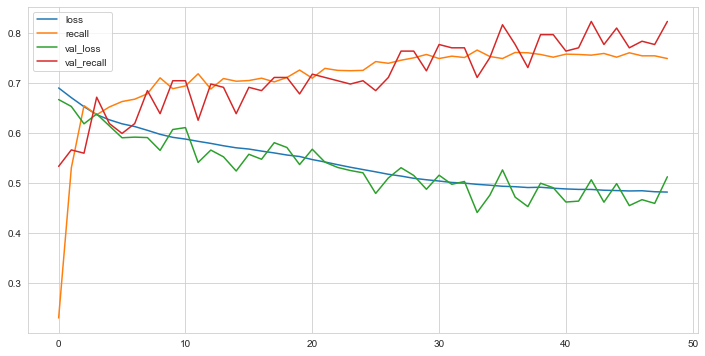

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [104]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[1135  458]
 [  78  329]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1593
           1       0.42      0.81      0.55       407

    accuracy                           0.73      2000
   macro avg       0.68      0.76      0.68      2000
weighted avg       0.83      0.73      0.76      2000



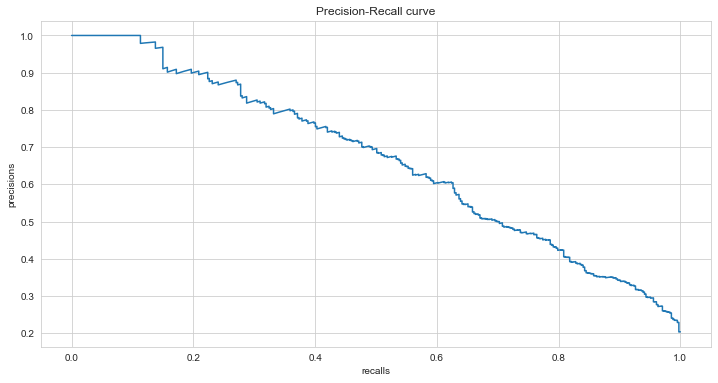

In [105]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


In [106]:
average_precision_score(y_test, y_pred_proba)   

0.6665169663853729

## GridSearchCV

In [107]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [109]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate), loss='binary_crossentropy', metrics=['Recall'])
    return classifier

In [110]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [112]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {'batch_size': [128, 256], 'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD], 'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator=classifier,param_grid=parameters, scoring='recall', cv=5,n_jobs=-1, verbose=0).fit(X_train, y_train, class_weight=class_weights)

Epoch 1/200
63/63 [==============================] - 1s 1ms/step - loss: 0.6674 - recall: 0.4693
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 0.6262 - recall: 0.6681
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 0.6054 - recall: 0.6699
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5870 - recall: 0.6994
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5750 - recall: 0.6969
Epoch 6/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5635 - recall: 0.6883
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5537 - recall: 0.7153
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5393 - recall: 0.7233
Epoch 9/200
63/63 [==============================] - 0s 1ms/step - loss: 0.5311 - recall: 0.7270
Epoch 10/200
63/63 [==============================] - 0s 1ms/step - loss: 0.5186 - recall: 0.7356
Epoch 11/200
63/63 [=========

In [113]:
grid_model.best_score_

0.7642002502067757

In [114]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [115]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1256  337]
 [  97  310]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.76      0.59       407

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000



#### ROC-AUC

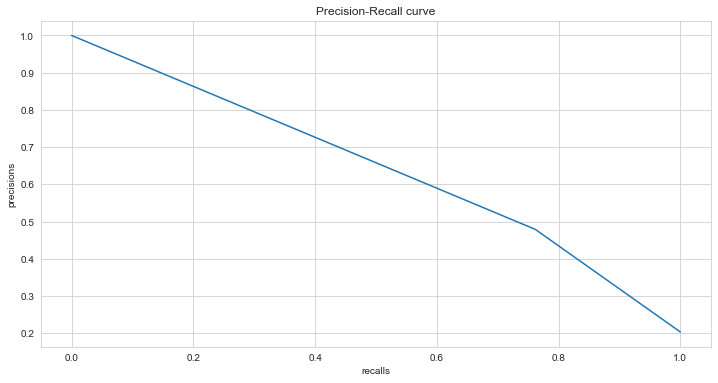

In [116]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [117]:
average_precision_score(y_test, y_pred_proba)

0.4134427142471964

## Final Model and Model Deployment

In [118]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [119]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)    
# {'batch_size': 256,'learn_rate': 0.003,'optimizer': keras.optimizer_v2.adam.Adam}
# pay attention!! validation data 

Epoch 1/200
32/32 [==============================] - 1s 8ms/step - loss: 0.6786 - recall: 0.4117 - val_loss: 0.6552 - val_recall: 0.4840
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6474 - recall: 0.6117 - val_loss: 0.6522 - val_recall: 0.6929
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6248 - recall: 0.6472 - val_loss: 0.6159 - val_recall: 0.6290
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6117 - recall: 0.6607 - val_loss: 0.6378 - val_recall: 0.7199
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5992 - recall: 0.6865 - val_loss: 0.6885 - val_recall: 0.8059
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5913 - recall: 0.7104 - val_loss: 0.5532 - val_recall: 0.6339
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5811 - recall: 0.6945 - val_loss: 0.5769 - val_recall: 0.6757
Epoch 8/200
32/32 [======================

<AxesSubplot:>

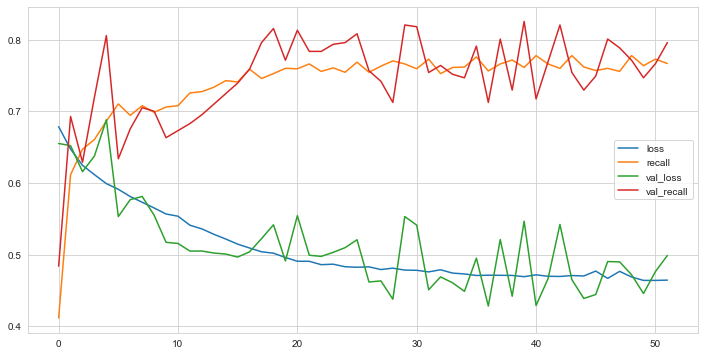

In [120]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [121]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.49886608123779297
recall :  0.7960687875747681


In [122]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1168  425]
 [  83  324]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1593
           1       0.43      0.80      0.56       407

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



In [123]:
model.save('model_churn.h5')

### Prediction

In [124]:
single_customer = df.drop('Exited', axis=1).iloc[999]
single_customer

CreditScore            759.000
Age                     38.000
Tenure                   1.000
Balance             104091.290
NumOfProducts            1.000
HasCrCard                0.000
IsActiveMember           0.000
EstimatedSalary      91561.910
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1000, dtype: float64

In [125]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.818     , 0.27027027, 0.1       , 0.43664732, 0.        ,
        0.        , 0.        , 0.45779537, 0.        , 0.        ,
        0.        ]])

In [126]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

array([[0]])

In [127]:
df["Exited"].iloc[999]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___